In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

data = pd.read_csv("features_30_sec.csv")
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [2]:
genre_map = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5,
             "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
data['label'] = data['label'].map(genre_map)
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [3]:
from sklearn.model_selection import train_test_split

y = data['label'].values
X = data.iloc[:, 1:-1].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree = DecisionTreeClassifier()
#1, 2, 3, 4, 5, 10, 15, 20, None
param_grid = {
    'max_depth': [15],
    "criterion": ["entropy"],
    'random_state':  [28],
}
gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print(f"Test Accuracy: {gs.score(X_test, y_test)*100:0.3f}%")

Best Accuracy: 61.29%
Best Params: {'criterion': 'entropy', 'max_depth': 15, 'random_state': 28}
Test Accuracy: 64.333%


In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
#84: 80.667%
#171: 81.333%
#261: 81.667%
params = {
    "n_estimators": [252],
    "random_state": [261],
    "max_depth": [15],
    "criterion": ["gini"],
    "oob_score": [True]
}

gs2 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

gs2.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs2.best_score_*100))
print('Best Params: %s' % gs2.best_params_)
print(f"Test Accuracy: {gs2.score(X_test, y_test)*100:0.3f}%")

Best Accuracy: 75.86%
Best Params: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 252, 'oob_score': True, 'random_state': 261}
Test Accuracy: 81.667%


In [6]:
forest = RandomForestClassifier(n_estimators=252, random_state=171, max_depth=15, criterion="gini")
forest.fit(X_train, y_train)
print(f"Test Accuracy: {forest.score(X_test, y_test)*100:0.3f}%")

Test Accuracy: 81.333%


In [7]:
importances = forest.feature_importances_
sorted_imp = np.argsort(importances)[::-1]
sorted_imp
importances

array([0.03781445, 0.04188093, 0.02875554, 0.02558106, 0.03097329,
       0.01920131, 0.02453142, 0.02471368, 0.01255682, 0.02329016,
       0.02193438, 0.01811777, 0.01732598, 0.01399005, 0.02373727,
       0.01544429, 0.04438257, 0.00851204, 0.02788348, 0.01735062,
       0.01479707, 0.0099435 , 0.01348194, 0.01486209, 0.029429  ,
       0.01767241, 0.01313447, 0.02129293, 0.01888644, 0.01486987,
       0.01453518, 0.0156602 , 0.01670356, 0.01364016, 0.01993072,
       0.01135942, 0.01198043, 0.01626784, 0.01361949, 0.01097835,
       0.02018987, 0.00954041, 0.01353429, 0.01067268, 0.01048249,
       0.00903863, 0.01040428, 0.00861303, 0.00992978, 0.01040656,
       0.01445577, 0.00897496, 0.01023024, 0.01215905, 0.01045364,
       0.01156937, 0.01107031, 0.0172525 ])

In [8]:
data.columns[1:-1]

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='

In [9]:
col_ranks = []

for i in range(0, 58):
    col = []
    col.append(importances[i])
    col.append(data.columns[1:-1][i])
    col_ranks.append(col)
col_ranks = sorted(col_ranks, key=lambda x: x[0])

new_order = []
new_imp = []
for ls in col_ranks:
    new_imp.append(ls[0])
    new_order.append(ls[1])

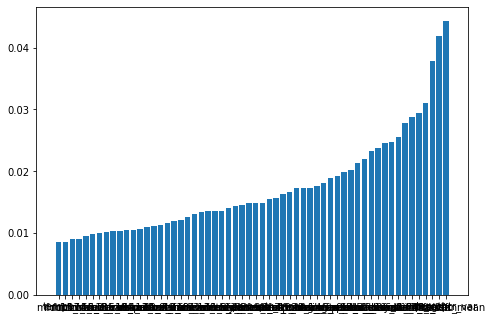

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(new_order,new_imp)
plt.xticks(rotation=0)
plt.show()

In [11]:
data3 = pd.read_csv("features_3_sec.csv")

genre_map = {"blues": 0, "classical": 1, "country": 2, "disco": 3, "hiphop": 4, "jazz": 5,
             "metal": 6, "pop": 7, "reggae": 8, "rock": 9}
data3['label'] = data3['label'].map(genre_map)
data3.head()

y3 = data3['label'].values
X3 = data3.iloc[:, 1:-1].values

from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

minmax = MinMaxScaler()
model=minmax.fit(X3)
minmax=model.transform(X3)

X3_train, X3_test, y3_train, y3_test = \
    train_test_split(X3, y3, test_size = 0.3, random_state = 0, stratify = y3)

sX3_train = scaler.fit_transform(X3_train)
sX3_test = scaler.fit_transform(X3_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
import time

t1 = time.time()
rf3 = RandomForestClassifier()

params = {
    "n_estimators": [380],
    "random_state": [261],
    "max_depth": [20],
    "criterion": ["gini"],
    "oob_score": [True],
    "warm_start": [True, False]
}

gs3 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=5)

gs3.fit(X3_train, y3_train)

print(str(time.time() - t1))
print('Best Accuracy: %.2f%%' % (gs3.best_score_*100))
print('Best Params: %s' % gs3.best_params_)
print(f"Test Accuracy: {gs3.score(X3_test, y3_test)*100:0.3f}%")

227.87540483474731
Best Accuracy: 85.16%
Best Params: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 380, 'oob_score': True, 'random_state': 261, 'warm_start': True}
Test Accuracy: 87.287%


In [13]:
#2: 94.333%
#for i in range(26, 31):
t1 = time.time()
forest3 = RandomForestClassifier(n_estimators=380, random_state=261, max_depth=20, criterion="gini", oob_score=True, warm_start=True)
forest3.fit(sX3_train, y3_train)
print(f"Test Accuracy: {forest3.score(sX3_test, y3_test)*100:0.3f}%")
print(str(time.time()-t1), str(i))

Test Accuracy: 86.553%
22.75753617286682 57


In [14]:
importances3 = forest3.feature_importances_
sorted_imp3 = np.argsort(importances3)[::-1]
sorted_imp
importances3

data.columns[1:-1]
importances3

array([0.        , 0.03478034, 0.01881505, 0.03208427, 0.03591123,
       0.02245804, 0.02093346, 0.03272173, 0.01368996, 0.02450623,
       0.0229388 , 0.02047299, 0.01134118, 0.02041489, 0.02602223,
       0.02632342, 0.05047497, 0.01066208, 0.02687041, 0.02311584,
       0.01805299, 0.01059822, 0.01922725, 0.01732721, 0.03241651,
       0.01663767, 0.01492047, 0.01934044, 0.0213822 , 0.01563797,
       0.01609249, 0.01362654, 0.01912836, 0.01233947, 0.02239698,
       0.01028137, 0.01260541, 0.0117353 , 0.01676169, 0.00930907,
       0.01786355, 0.0089838 , 0.01613501, 0.00889375, 0.01189836,
       0.00831342, 0.01301923, 0.00775935, 0.01061296, 0.00817116,
       0.01426614, 0.00797897, 0.01056303, 0.0091038 , 0.00981128,
       0.01061915, 0.0105936 , 0.01105871])

In [15]:
col_ranks3 = []

for i in range(0, 58):
    col = []
    col.append(importances[i])
    col.append(data.columns[1:-1][i])
    col_ranks3.append(col)
col_ranks3 = sorted(col_ranks, key=lambda x: x[0])

new_order3 = []
new_imp3 = []
for ls in col_ranks3:
    new_imp3.append(ls[0])
    new_order3.append(ls[1])

In [16]:
top_order = new_order3[53:58]
top_order

['mfcc4_mean', 'rms_var', 'length', 'chroma_stft_mean', 'perceptr_var']

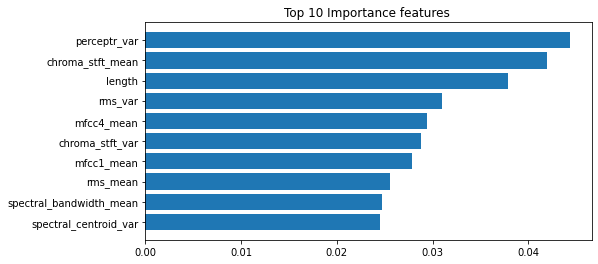

In [17]:
f, ax = plt.subplots(figsize=(8, 4))

ax.barh(new_order3[48:58],new_imp3[48:58])
plt.title("Top 10 Importance features ")
plt.xticks(rotation=0)
plt.show()

Text(0, 0.5, 'Accuracy')

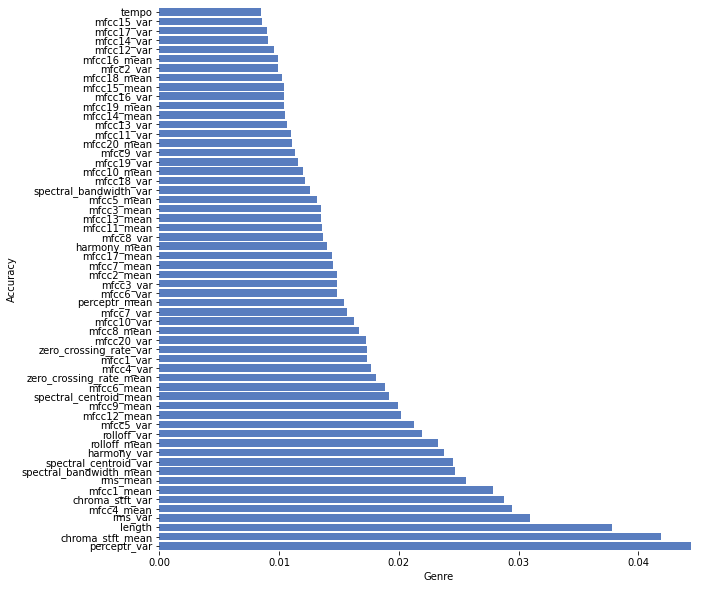

In [18]:
f, ax = plt.subplots(figsize=(10, 10));
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
sns.barplot(x=new_imp3, y=new_order3, color="b", orient='h')
sns.despine(left=True, bottom=True)

plt.xlabel("Genre")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean decrease in impurity')

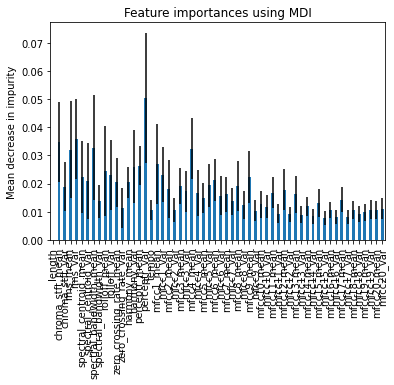

In [20]:
std = np.std([tree.feature_importances_ for tree in forest3.estimators_], axis=0)

forest_importances = pd.Series(importances3, index=data.columns[1:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [22]:
from sklearn import metrics

y_pred = forest3.predict(X3_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y_pred)))

Mean Absolute Error: 3.5285285285285286
Mean Squared Error: 19.08808808808809
Root Mean Squared Error: 4.368991655758579


In [ ]:
mod_data = data3

col_ranks3
low_importance = []
high_importance = []
for ls in col_ranks3:
    if ls[0] < 0.01:
        low_importance.append(ls[1])
        continue
    high_importance.append(ls[1])
        
low_importance


for col in mod_data.columns:
    if col in low_importance:
        del mod_data[col]
        

mod_y = mod_data['label'].values
mod_X = mod_data.iloc[:, 1:-1].values

modX_train, modX_test, mody_train, mody_test = \
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
forest3 = RandomForestClassifier(n_estimators=412, random_state=2, max_depth=20, criterion="gini", oob_score=True)
forest3.fit(modX_train, mody_train)
print(f"Test Accuracy: {forest3.score(X_test, y_test)*100:0.3f}%")

In [ ]:
from collections import Counter
genre_accuracy = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
errors = []
i = 0 
for i in range(len(y3_pred)):
    if y3_test[i] != y3_pred[i]:
        error = []
        error.append(y3_pred[i])
        error.append(y3_test[i])
        errors.append(error)
errors
print(errors)
pred = Counter()
Counter((y_pred))

hundred = Counter(y3_test)
errors

for e in errors:
    hundred[e[1]] -= 1
hundred

acc = {}
for g in range(len(list(set(data["label"].values)))):
    acc[list(set(data["label"].values))[g]] = round(hundred[g] / 30, 4) * 10
acc=dict(sorted(acc.items(),key= lambda x:x[1]))
acc

In [ ]:
import seaborn as sns

genres = list(acc.keys())
values = list(acc.values())

f, ax = plt.subplots(figsize=(12, 6));
sns.barplot(x=genres, y=values, palette = 'cubehelix')

plt.xlabel("Genre")
plt.ylabel("Accuracy")



In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

confmat = confusion_matrix(y3_test, y3_pred)

fig, ax = plot_confusion_matrix(conf_mat=confmat, show_absolute=True, show_normed=True, figsize=(8,8))
plt.show()

In [ ]:
acc

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

t1 = time.time()
xgb = XGBClassifier(n_estimators = 1000, learning_rate = 0.05, use_label_encoder = False)
xgb.fit(X3_train, y3_train)

xgb_pred = xgb.predict(X3_test)
print(str(time.time()-t1), str(i))
print("Accuracy: " + str(round(accuracy_score(y3_test, xgb_pred), 5)))

In [ ]:
x = XGBClassifier()

params = {
    "n_estimators": [380],
    "random_state": [261],
    "max_depth": [20],
    "criterion": ["gini"],
    "oob_score": [True]
}

gs3 = GridSearchCV(estimator=rf,
                  param_grid=params,
                  scoring='accuracy',
                  cv=2)
range(0[, 6e-2)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna


def optimization_objective(trial, X_train, y_train, cv=5):

    
    params =  {
            "n_estimators": trial.suggest_categorical("n_estimators", [1000]),
            "learning_rate": trial.suggest_categorical("learning_rate", [0.01, 0.03, 0.05]),
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }
    

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(cv_iterator.split(X_train, y_train)):
        
        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]
        

        model = XGBClassifier(**params, random_state=123, use_label_encoder=False, tree_method = "hist")
        
        model.fit(
            X_train_sub,
            y_train_sub,
            verbose=False,
            eval_set=[(X_valid, y_valid)],
            eval_metric="auc",
            early_stopping_rounds=100,
        )
        
        preds = model.score(X_valid, y_valid)
        
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")

def func(trial):
    return optimization_objective(trial, X3_train, y3_train)

study.optimize(func, n_trials = 10);